In [1]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import confusion_matrix and Area under ROC curve
from sklearn.metrics import confusion_matrix,roc_curve

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

plt.style.use('ggplot')

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
# Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [26]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

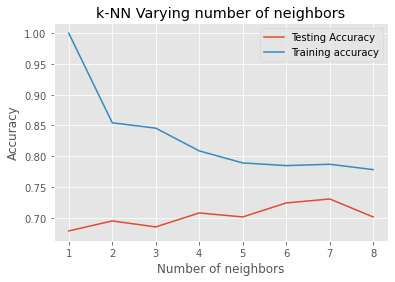

In [27]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [47]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [52]:
knn.score(X_test,y_test)

0.7305194805194806

In [32]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[173,  28],
       [ 55,  52]], dtype=int64)

In [34]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

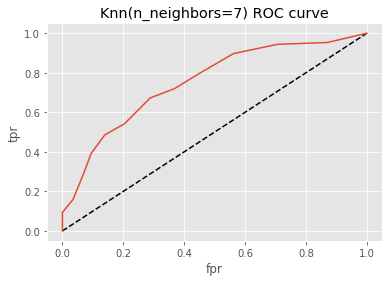

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [51]:
roc_auc_score(y_test,y_pred_proba)

0.7523596968428884

In [39]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}

In [40]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [41]:
knn_cv.best_score_

0.7500381970970207

In [42]:
knn_cv.best_params_

{'n_neighbors': 8}